## Project Description:-
The goal of this project is to build a classification model to determine the quality of red and white variants of Portuguese "Vinho Verde" wine based on physicochemical properties. The dataset available for analysis includes several input variables obtained through physicochemical tests, such as fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, and alcohol.

In [1]:
# First Import the libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the dataset

df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [4]:
df.sample(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
669,11.3,0.340,0.45,2.0,0.082,6.0,15.0,0.99880,2.94,0.66,9.2,6
428,9.1,0.520,0.33,1.3,0.070,9.0,30.0,0.99780,3.24,0.60,9.3,5
1185,7.0,0.430,0.30,2.0,0.085,6.0,39.0,0.99346,3.33,0.46,11.9,6
1022,7.0,0.510,0.09,2.1,0.062,4.0,9.0,0.99584,3.35,0.54,10.5,5
340,12.2,0.340,0.50,2.4,0.066,10.0,21.0,1.00000,3.12,1.18,9.2,6
404,7.7,0.690,0.05,2.7,0.075,15.0,27.0,0.99740,3.26,0.61,9.1,5
1453,7.6,0.490,0.33,1.9,0.074,27.0,85.0,0.99706,3.41,0.58,9.0,5
11,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
81,7.8,0.430,0.70,1.9,0.464,22.0,67.0,0.99740,3.13,1.28,9.4,5
30,6.7,0.675,0.07,2.4,0.089,17.0,82.0,0.99580,3.35,0.54,10.1,5



## EDA

In [5]:
df.shape

(1599, 12)

In [6]:
# we have 1599 rows and 12 columns.

In [7]:
# Checking the columns of the dataset

df.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [8]:
# Checking the datatypes of the dataset
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [9]:
# There is only 2 datatyes in dataset, All independent features datatype is float64 and target feature datatype is int64

In [10]:
# Checking the null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
# We can see there is no null values present in the dataset

In [12]:
df.isnull().sum().sum()

0

In [13]:
# Checking the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


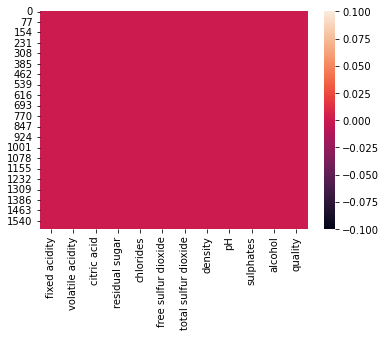

In [14]:
# we can aslo visulize for null values
sns.heatmap(df.isnull())
plt.show()

In [15]:
# We can clearly see that there is no null values present in the dataset

In [16]:
# Checking the unique values in the dataset
for column in df.columns:
    print("Column Name:", column)
    print("Number of Unique Values:", df[column].nunique())
    print("\n")

Column Name: fixed acidity
Number of Unique Values: 96


Column Name: volatile acidity
Number of Unique Values: 143


Column Name: citric acid
Number of Unique Values: 80


Column Name: residual sugar
Number of Unique Values: 91


Column Name: chlorides
Number of Unique Values: 153


Column Name: free sulfur dioxide
Number of Unique Values: 60


Column Name: total sulfur dioxide
Number of Unique Values: 144


Column Name: density
Number of Unique Values: 436


Column Name: pH
Number of Unique Values: 89


Column Name: sulphates
Number of Unique Values: 96


Column Name: alcohol
Number of Unique Values: 65


Column Name: quality
Number of Unique Values: 6




In [17]:
# We can see the count of unique values present in the datset

In [18]:
# Check the value count of the dataset
for column in df.columns:
    print("Column Name:", column)
    print("value counts:", df[column].value_counts())
    print("\n")

Column Name: fixed acidity
value counts: 7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


Column Name: volatile acidity
value counts: 0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64


Column Name: citric acid
value counts: 0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64


Column Name: residual sugar
value counts: 2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64


Column Name: chlorides
value counts: 0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.

In [19]:
# we can see the value count of all the columns, we can see no any abnormality

In [20]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [21]:
# checking the statistical value
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [22]:
# We can see all columns counts are equal means no missing values
# In all columns the maximum value is high means chance of outliers
# In all the columns mean and 50% is approx equal mean there is less skewness in the dataset

## Graphical analysis

In [23]:
df.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


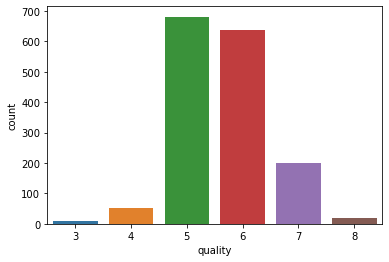

In [24]:
sns.countplot(x='quality', data=df)
plt.show()

In [25]:
# we can see same count in the graph, our most of the data fall btween 5 and 6 quality ratings

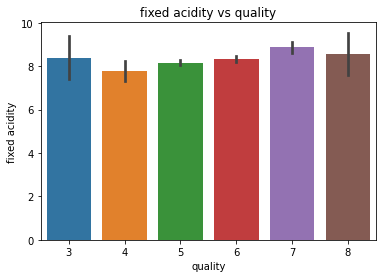

In [26]:
# check the fixed acidity vs quality column
plt.title('fixed acidity vs quality')
sns.barplot(x='quality', y='fixed acidity', data=df)
plt.show()

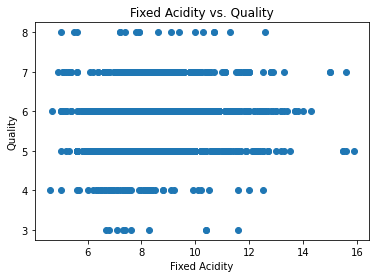

In [27]:
plt.title('Fixed Acidity vs. Quality')
plt.scatter(x='fixed acidity', y='quality', data=df)
plt.xlabel('Fixed Acidity')
plt.ylabel('Quality')
plt.show()


In [28]:
# We can see here that there is no strong relationship btween fixed acidity and quality

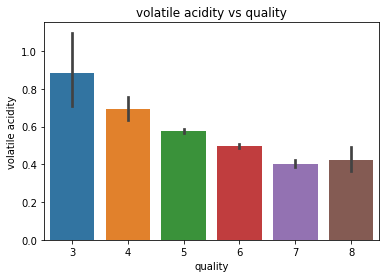

In [29]:
# check the voilet acidity vs quality
sns.barplot(x='quality', y='volatile acidity',data=df)
plt.title('volatile acidity vs quality')
plt.show()

In [30]:
# we can observe that high volatile acidity contains less quality wine as volatile acidity contains has good quality wines

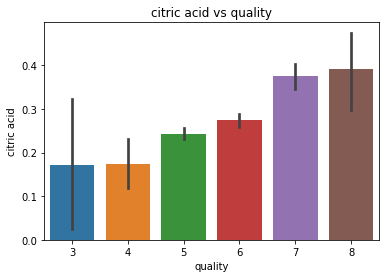

In [31]:
# check the citric acid vs quality
sns.barplot(x='quality', y='citric acid',data=df)
plt.title('citric acid vs quality')
plt.show()

In [32]:
# We can observe that high citric acid contains good quality wine

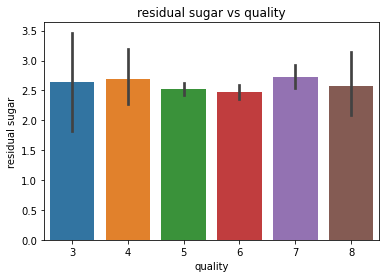

In [33]:
# check the residual sugar vs quality
sns.barplot(x='quality', y='residual sugar',data=df)
plt.title('residual sugar vs quality')
plt.show()

In [34]:
# we can see residual suger has equal waitage in each quality of wines.

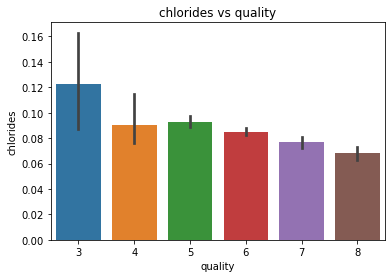

In [35]:
# check the chlorides vs quality
sns.barplot(x='quality', y='chlorides',data=df)
plt.title('chlorides vs quality')
plt.show()

In [36]:
# we can observe that less chlorides present has high qulity wines

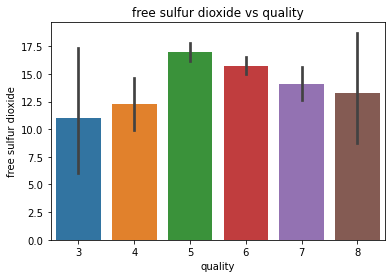

In [37]:
# Check the free sulfur dioxide vs quality
sns.barplot(x='quality', y='free sulfur dioxide', data=df)
plt.title('free sulfur dioxide vs quality')
plt.show()

In [38]:
# We can observe that free sulfur dioxide having wines quality is 5 ratings and also 8 quality ratings.

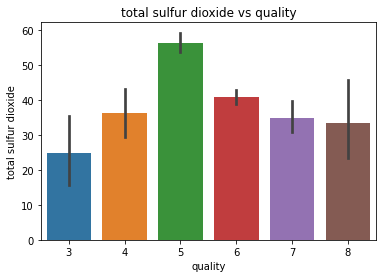

In [39]:
# Check for total sulfur dioxide vs quality

sns.barplot(x='quality', y='total sulfur dioxide', data=df)
plt.title('total sulfur dioxide vs quality')
plt.show()

In [40]:
# wine contains total sulfur dioxide has the 5 quality ratings

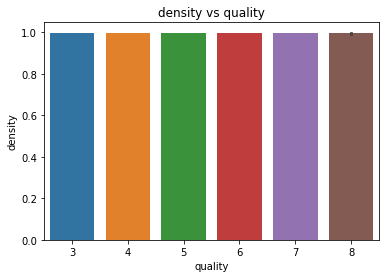

In [41]:
# check for the density vs quality
sns.barplot(x='quality', y='density', data=df)
plt.title('density vs quality')
plt.show()

In [42]:
# We can observe that every wine quality contains equal density value.

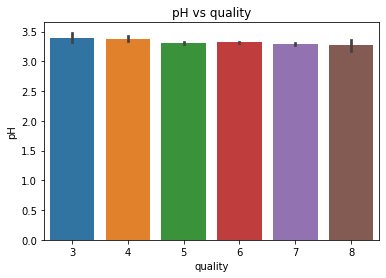

In [43]:
# Check for the pH vs quality

sns.barplot(x='quality', y='pH', data=df)
plt.title('pH vs quality')
plt.show()

In [44]:
# Ph value has also same value in each quality of wines

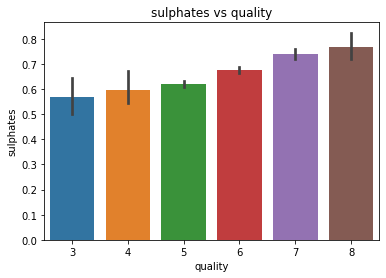

In [45]:
# check for sulphates vs quality
sns.barplot(x='quality', y='sulphates', data=df)
plt.title('sulphates vs quality')
plt.show()

In [46]:
# We can observe that if sulphates value is less then our quality of wine is higher. 

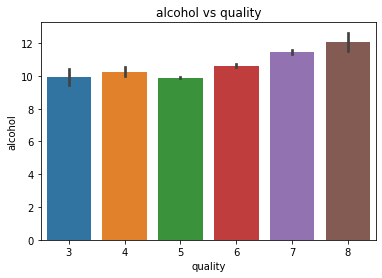

In [47]:
# check for alcohol vs quality
sns.barplot(x='quality', y='alcohol', data=df)
plt.title('alcohol vs quality')
plt.show()

In [48]:
# Here also we can see high quality wines has high alcohol level.

In [49]:
x=df.drop(columns=['quality'])
y=df['quality']

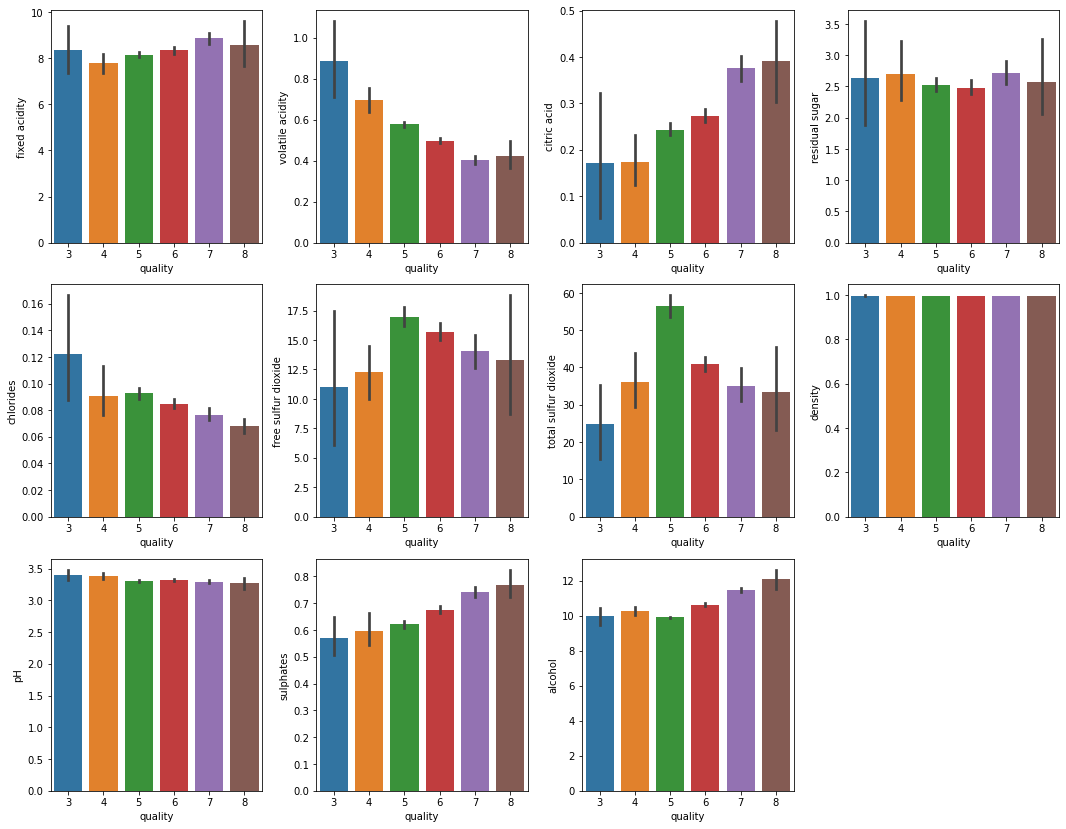

In [50]:
plt.figure(figsize=(15, 15))
plotnumber = 1

for i in x:
    if plotnumber <= 15:
        ax = plt.subplot(4, 4, plotnumber)
        sns.barplot(x=y, y=i, data=df)
        plt.xlabel('quality', fontsize=10)
        plt.ylabel(i, fontsize=10)
    plotnumber += 1

plt.tight_layout()
plt.show()

In [51]:
# We can see all the observation in one set also

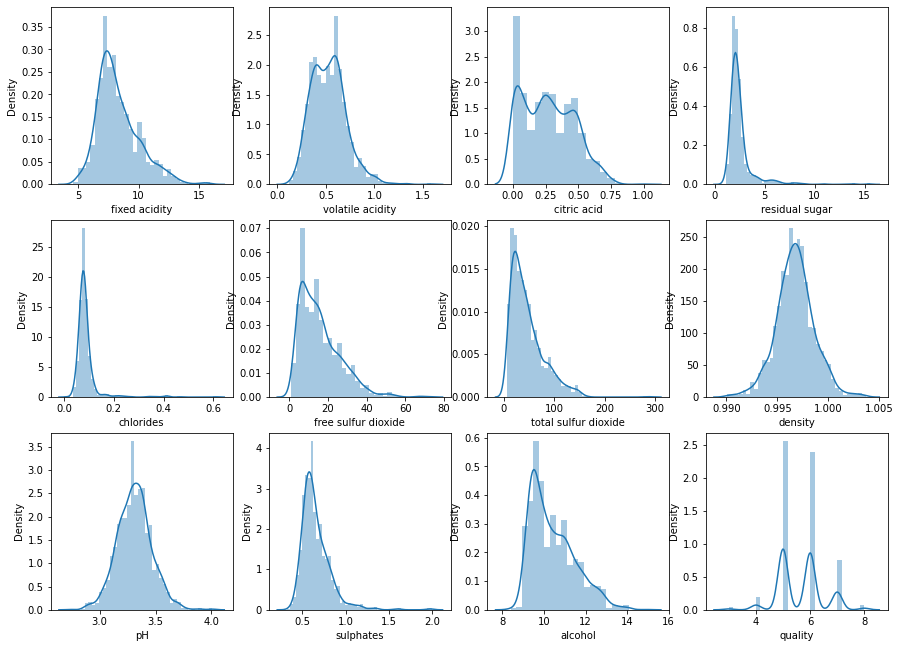

In [52]:
# Check the distribution of the dataset

plt.figure(figsize=(15,15))
plotnumber=1

for i in df.columns:
    if plotnumber<=15:
        axs=plt.subplot(4,4,plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=10)
    plotnumber+=1
plt.show()

In [53]:
# we can see some skewness in residual sugar, chlorides, free sulferdioxide, total sulferdioxide, sulphates
# means there is chance of outliers present in these columns

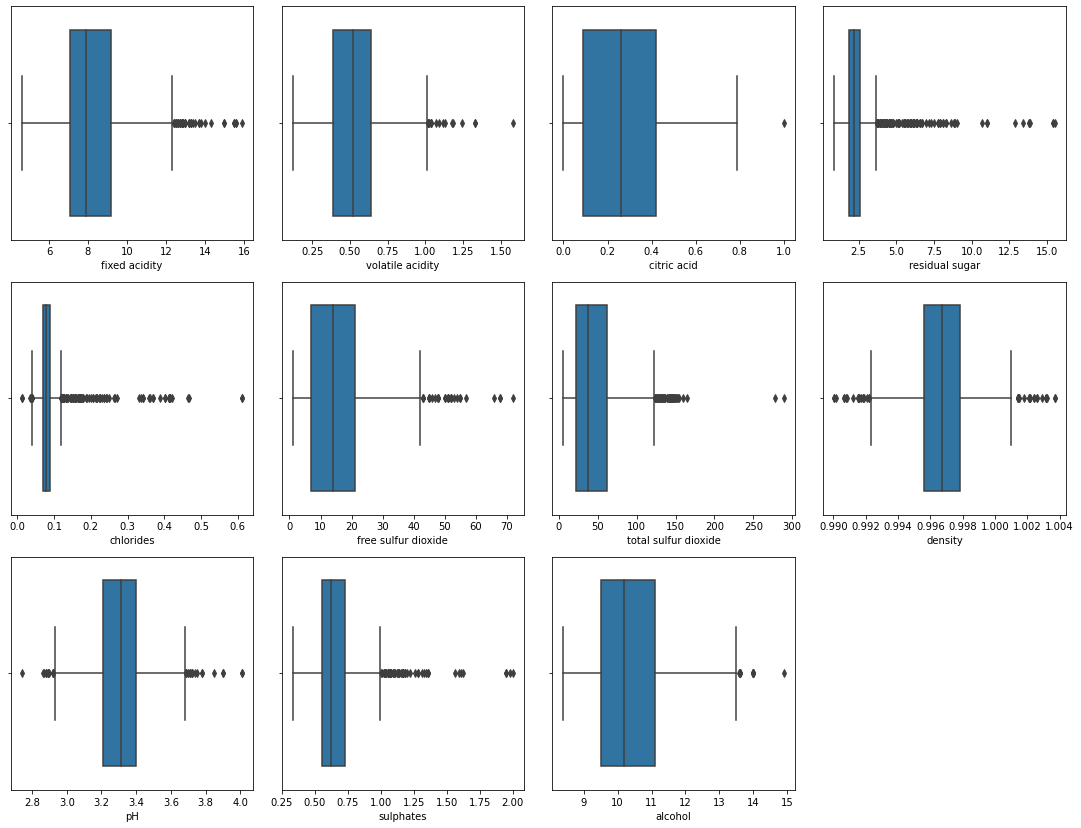

In [54]:
# we will check the outliers for the data set
plt.figure(figsize=(15, 15))
plotnumber = 1

for i in x:
    if plotnumber <= 15:
        ax = plt.subplot(4, 4, plotnumber)
        sns.boxplot(x=df[i])
        plt.xlabel(i, fontsize=10)
    plotnumber += 1

plt.tight_layout()
plt.show()

In [55]:
# we will check the skewness
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

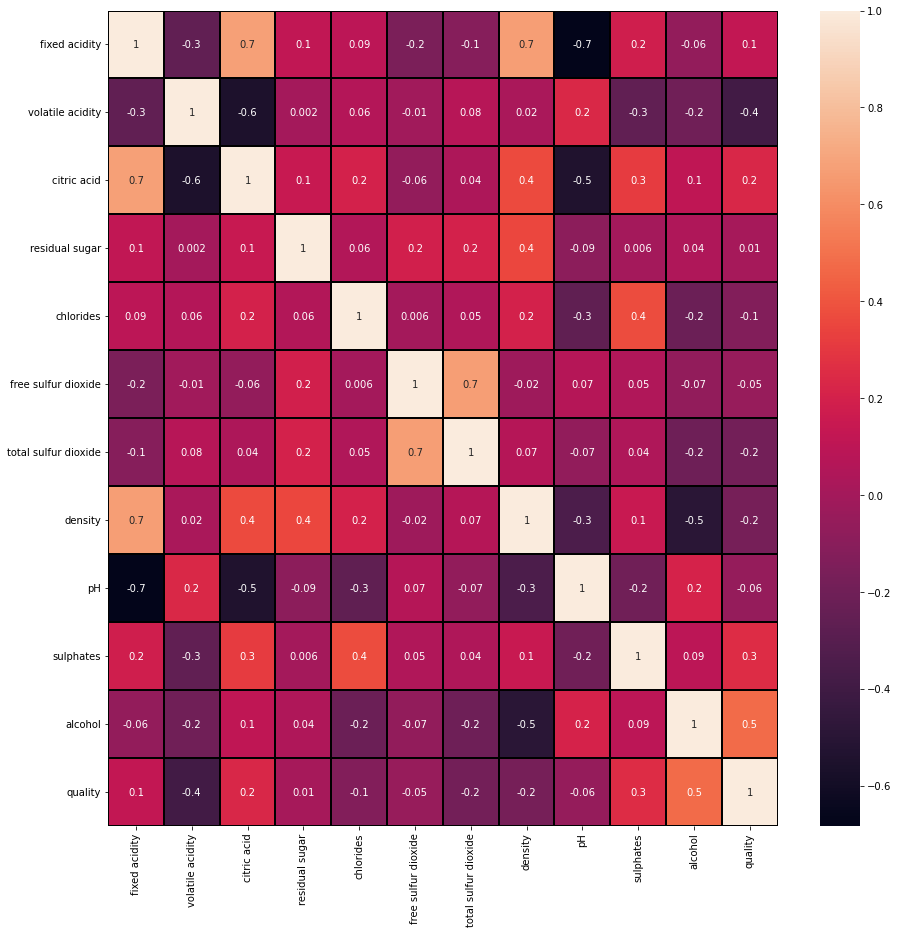

In [56]:
# we will check the coorelation b/w that columns
cor=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor,annot=True,fmt='.1g', linewidths=0.1, linecolor='black')
plt.show()

In [57]:
# We can observe that quality has very high +ve correlation with quality
# Quality has -ve correlation with quality
# Also alcohol has -ve coorelation with density
# Sulphate has the high +ve correlation with alcohol
# PH and fixed acidity has high -ve coorelation
# density and fixed acidity has high +ve coorelation
# Total sulpher and Free sulperdioxider has high +ve coorelation
# xetiric acid and colatile acidity has hifh _ve correlation

In [58]:
# Checking the corr value for target feature

cor['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [59]:
# We can observe that +ve and -ve correlatiob between feature and target variables

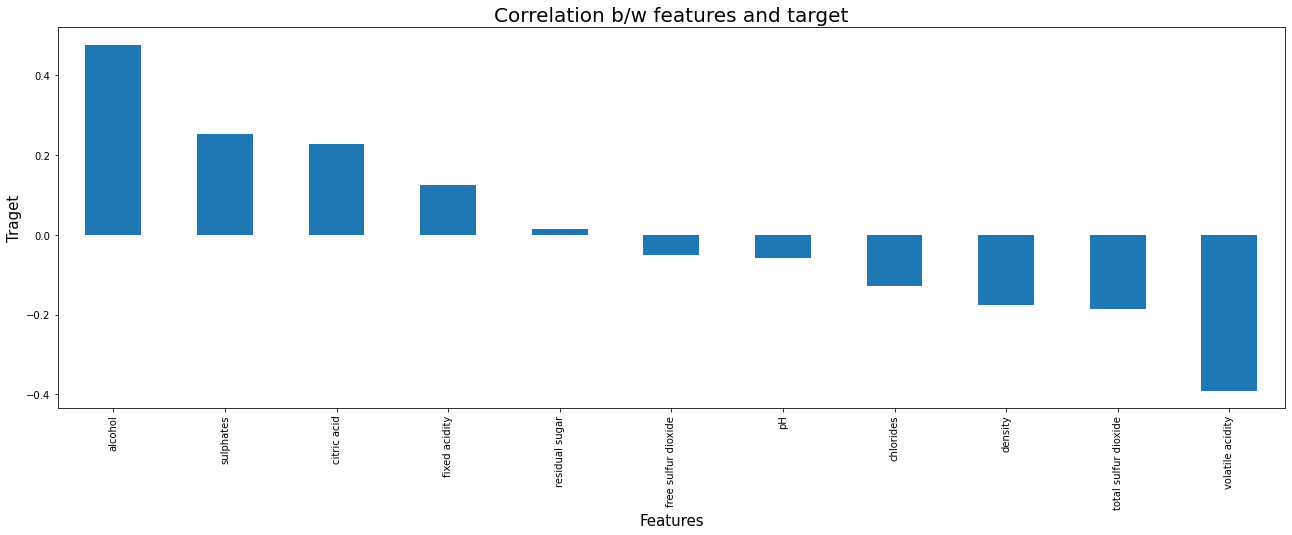

In [60]:
plt.figure(figsize=(22,7))
df.corr()['quality'].sort_values(ascending=False).drop(['quality']).plot(kind='bar')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Traget', fontsize=15)
plt.title('Correlation b/w features and target', fontsize=20)

plt.show()

In [61]:
# Residual sugar has very less coorelation with target variable

In [62]:
x=df.drop(columns=['quality'])
y=df['quality']

In [63]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


In [64]:
# Checking the variance inflation factor

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif= pd.DataFrame()
vif['VIF VALUES']=[variance_inflation_factor(x.values, i) for i in range (len(x.columns))]
vif['Features']=x.columns

vif

,VIF VALUES,Features
0,7.767512,fixed acidity
1,1.789390,volatile acidity
2,3.128022,citric acid
3,1.702588,residual sugar
4,1.481932,chlorides
5,1.963019,free sulfur dioxide
6,2.186813,total sulfur dioxide
7,6.343760,density
8,3.329732,pH
9,1.429434,sulphates


In [66]:
# We can see that fixed acidity has very correlation value, so we can drop these column

In [67]:
x.drop('fixed acidity', axis=1, inplace=True)

In [68]:
vif= pd.DataFrame()
vif['VIF VALUES']=[variance_inflation_factor(x.values, i) for i in range (len(x.columns))]
vif['Features']=x.columns

vif

,VIF VALUES,Features
0,1.784963,volatile acidity
1,2.780557,citric acid
2,1.386375,residual sugar
3,1.401232,chlorides
4,1.939209,free sulfur dioxide
5,2.069396,total sulfur dioxide
6,2.430096,density
7,1.610775,pH
8,1.396382,sulphates
9,2.136067,alcohol


In [69]:
# We can see our coolinearity problem is solved now

In [70]:
y_value = df["quality"].apply(lambda y:1 if y>=6 else 0)

In [71]:
y_value.value_counts()

1    855
0    744
Name: quality, dtype: int64

In [72]:
df['quality']=y_value

In [73]:
x=df.drop(columns=['quality'])
y=df['quality']

In [74]:
y.value_counts()

1    855
0    744
Name: quality, dtype: int64

In [75]:
# Still we have to solve the class imblance problem, for this we can resampling technique

In [76]:
#from imblearn.over_sampling import SMOTE
 #SM=SMOTE()
#x,y=SM.fit_resample(x,y)

In [77]:
x['fixed acidity'].shape

(1599,)

In [78]:
y.value_counts()

1    855
0    744
Name: quality, dtype: int64

In [79]:
# Our class imblance problem is also solved now

## Model building

In [80]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=3)

In [82]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train, y_train)


LogisticRegression()

In [83]:
pred_LR=LR.predict(x_test)
print(accuracy_score(y_test,pred_LR))
print(classification_report(y_test,pred_LR))

0.7625
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       152
           1       0.77      0.77      0.77       168

    accuracy                           0.76       320
   macro avg       0.76      0.76      0.76       320
weighted avg       0.76      0.76      0.76       320



In [84]:
# SO for logistic regression we have the accuracy of 76% and 75% precision and recall score

In [85]:
from sklearn.tree import DecisionTreeClassifier


In [86]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred_DTC=DTC.predict(x_test)
print(accuracy_score(y_test,pred_DTC))
print(classification_report(y_test,pred_DTC))

0.75
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       152
           1       0.77      0.75      0.76       168

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320



In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred_RFC=RFC.predict(x_test)
print(accuracy_score(y_test,pred_RFC))
print(classification_report(y_test,pred_RFC))

0.840625
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       152
           1       0.86      0.83      0.84       168

    accuracy                           0.84       320
   macro avg       0.84      0.84      0.84       320
weighted avg       0.84      0.84      0.84       320



In [89]:
# so finally we can see the best accuracy with RandomForestClassifier

In [90]:
# So we will perform hyper parameter tuning with Random forest classifier

In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:
parameters={'criterion':['gini', 'entropy'],
           'random_state':[10,50,100],
           'max_depth':[0,10],
           'n_jobs':[-2,-1,1],
           'n_estimators':[50,100,200]}

In [93]:
GCV=GridSearchCV(RandomForestClassifier(), parameters, cv=5)

In [94]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [0, 10],
                         'n_estimators': [50, 100, 200], 'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 100]})

In [96]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 50}

In [98]:
final_model=RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=200, n_jobs=-2, random_state=50)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

86.25


In [99]:
# so our final accuracy with random forest is 86%